# Simple Neural Implementation of Iterative MAP Calculation (WITH LEARNING)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
%matplotlib inline

In [119]:
# True Statistics
v_mean = 6
v_sigma = 1.5
u_sigma = 1.5

def g(v):
    return np.square(v)
    # return v*4

def dg(v):
    return 2*v
    # return 4

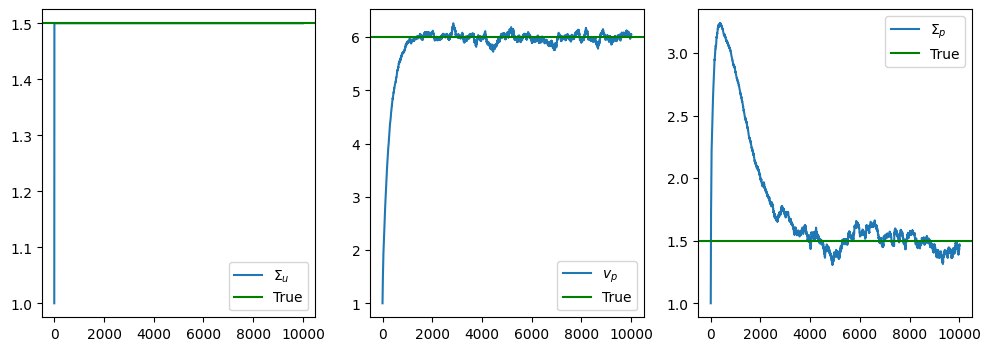

In [126]:
def simulate_learning(num_trials=10000, max_t=5, dt=0.01, lr=0.01):
    # Learnable Parameters, Initialised in lists for tracking
    v_p = [1]
    Sigma_p = [1]
    Sigma_u = [1]

    for _ in range(num_trials):

        # Sample cause 'v' and its observation 'u'
        v = np.random.normal(v_mean, np.sqrt(v_sigma))

        phi = v_p[-1]
        eps_u = 0
        eps_p = 0

        for _ in range(int(max_t / dt)):
            u = np.random.normal(g(v), np.sqrt(u_sigma))
            eps_u += dt * (u - g(phi) - Sigma_u[-1]*eps_u)
            eps_p += dt * (phi - v_p[-1] - Sigma_p[-1]*eps_p)
            phi += dt * (eps_u*dg(phi) - eps_p)
        
        dFdSigma_u = 0.5 * (np.square(eps_u) - (1/Sigma_u[-1]))
        dFdv_p = eps_p
        dFdSigma_p = 0.5 * (np.square(eps_p) - (1/Sigma_p[-1]))

        new_Sigma_u = Sigma_u[-1] + lr * dFdSigma_u
        new_v_p = v_p[-1] + lr * dFdv_p
        new_Sigma_p = Sigma_p[-1] + lr * dFdSigma_p

        new_Sigma_u = 1.0 if new_Sigma_u < 1.0 else new_Sigma_u
        # new_Sigma_p = 1.0 if new_Sigma_p < 1.0 else new_Sigma_p
        new_Sigma_u = u_sigma

        Sigma_u.append(new_Sigma_u)
        v_p.append(new_v_p)
        Sigma_p.append(new_Sigma_p)
    
    return Sigma_u, v_p, Sigma_p

Sigma_u, v_p, Sigma_p = simulate_learning()


fig, ax = plt.subplots(1, 3, figsize=(12,4))

ax[0].plot(Sigma_u, label='$\Sigma_u$')
ax[0].axhline(u_sigma, label='True', color='g')
ax[0].legend()

ax[1].plot(v_p, label='$v_p$')
ax[1].axhline(v_mean, label='True', color='g')
ax[1].legend()

ax[2].plot(Sigma_p, label='$\Sigma_p$')
ax[2].axhline(v_sigma, label='True', color='g')
ax[2].legend()


plt.show()

Sigma_u doesnt converge for some reason

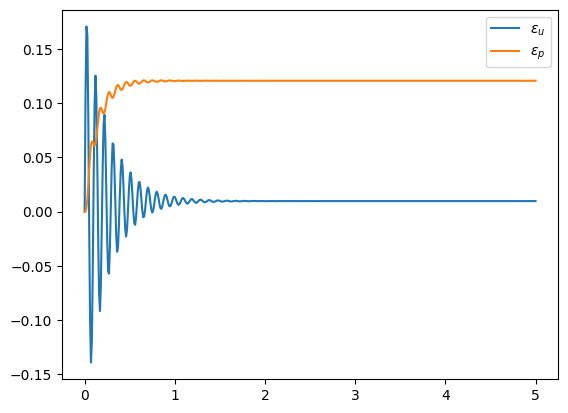

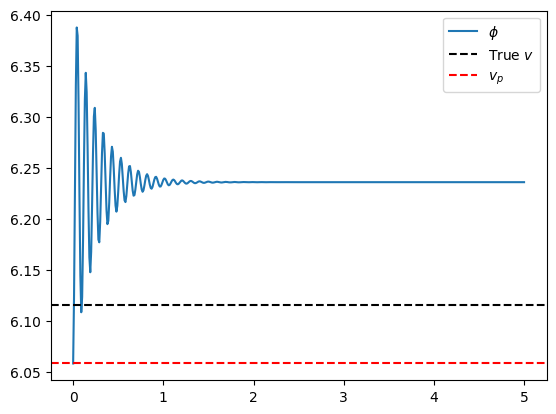

Final Values:
phi: 6.236122320276276
eps_u: 0.009691137565324876
eps_p: 0.12087024180102911


In [127]:
max_t = 5
dt = 0.01
lr = 0.05

v = np.random.normal(v_mean, np.sqrt(v_sigma))
u = np.random.normal(g(v), np.sqrt(u_sigma))

phi = [v_p[-1]]
eps_u = [0]
eps_p = [0]

for _ in range(int(max_t / dt)):
    eps_u.append(eps_u[-1] + lr * (u - g(phi[-1]) - Sigma_u[-1]*eps_u[-1]))
    eps_p.append(eps_p[-1] + lr * (phi[-1] - v_p[-1] - Sigma_p[-1]*eps_p[-1]))
    phi.append(phi[-1] + lr * (eps_u[-1]*dg(phi[-1]) - eps_p[-1]))

plt.plot(np.arange(0, max_t+dt, dt), eps_u, label='$\epsilon_u$')
plt.plot(np.arange(0, max_t+dt, dt), eps_p, label='$\epsilon_p$')
plt.legend()
plt.show()

plt.plot(np.arange(0, max_t+dt, dt), phi, label='$\phi$')
plt.axhline(v, color='black', linestyle='--', label='True $v$')
plt.axhline(v_p[-1], color='red', linestyle='--', label='$v_p$')
plt.legend()
plt.show()

print(f'Final Values:\nphi: {phi[-1]}\neps_u: {eps_u[-1]}\neps_p: {eps_p[-1]}')

# Variable Distribution Analysis

Distribution of final values:


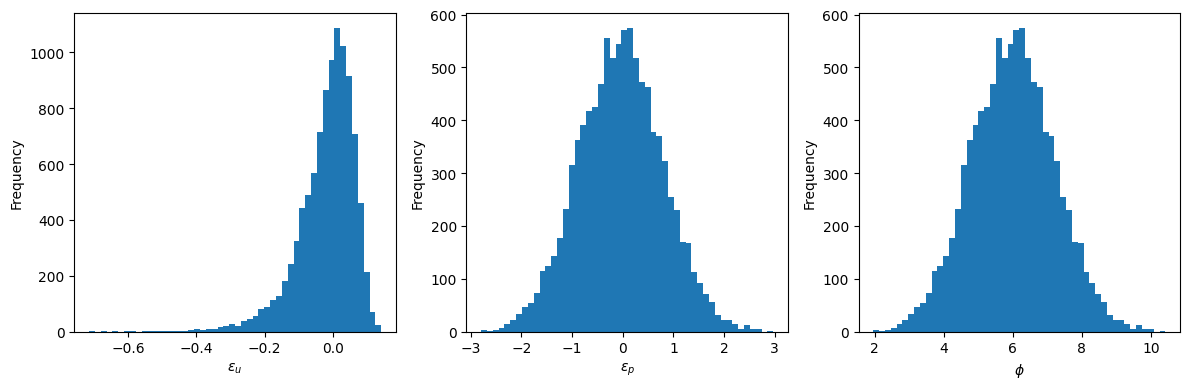

Distribution of epsilon convergences:


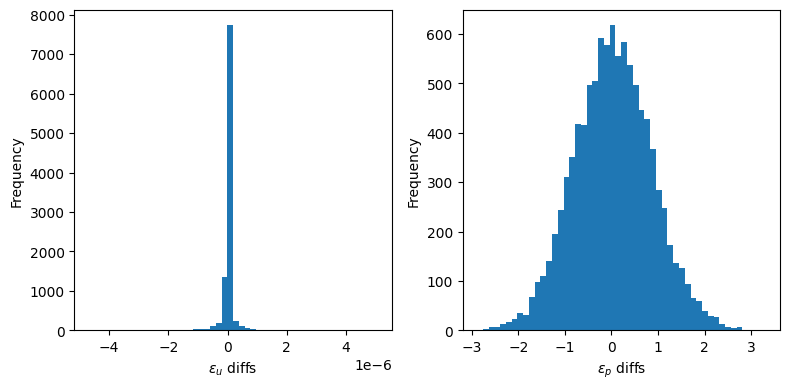

In [129]:
max_t = 5
dt = 0.01
lr = 0.05
num_trials = 10000

eps_us = []
eps_ps = []
phis = []
us = []

for _ in range(num_trials):

    # Sample cause 'v' and its observation 'u'
    v = np.random.normal(v_mean, np.sqrt(v_sigma))
    # v = np.random.normal(2, 0.5)
    u = np.random.normal(g(v), np.sqrt(u_sigma))

    phi = v_p[-1]
    eps_u = 0
    eps_p = 0

    for _ in range(int(max_t / dt)):
        eps_u += lr * (u - g(phi) - Sigma_u[-1]*eps_u)
        eps_p += lr * (phi - v_p[-1] - Sigma_p[-1]*eps_p)
        phi += lr * (eps_u*dg(phi) - eps_p)
    
    eps_us.append(eps_u)
    eps_ps.append(eps_p)
    phis.append(phi)
    us.append(u)

print('Distribution of final values:')
fig, ax = plt.subplots(1, 3, figsize=(12,4))

ax[0].hist(eps_us, bins=50)
ax[0].set_xlabel(r'$\epsilon_u$')
ax[0].set_ylabel('Frequency')

ax[1].hist(eps_ps, bins=50)
ax[1].set_xlabel(r'$\epsilon_p$')
ax[1].set_ylabel('Frequency')

ax[2].hist(phis, bins=50)
ax[2].set_xlabel(r'$\phi$')
ax[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print('Distribution of epsilon convergences:')
eps_u_diff = (np.array(us) - g(np.array(phis))) / Sigma_u[-1] - np.array(eps_us)
eps_p_diff = (np.array(phis) - np.array(vs)) / Sigma_p[-1] - np.array(eps_ps)

fig, ax = plt.subplots(1, 2, figsize=(8,4))

ax[0].hist(eps_u_diff, bins=50)
ax[0].set_xlabel(r'$\epsilon_u$ diffs')
ax[0].set_ylabel('Frequency')

ax[1].hist(eps_p_diff, bins=50)
ax[1].set_xlabel(r'$\epsilon_p$ diffs')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()
